In [1]:
import config
import pandas as pd
import glob

In [2]:
# modules used for easier display of data
from IPython.display import display
from IPython.core.display import HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Load Data

In [3]:
data_files = glob.glob(config.data_dir+'*.csv')
print('number of files: ',len(data_files))

number of files:  15


In [4]:
dfs = []
for i,f in enumerate(data_files):
    df_i = pd.read_csv(f,sep=',',names=config.cols)
    df_i['participant_id'] = i
    dfs.append(df_i)
df  =pd.concat(dfs).reset_index(drop=True)
print(df.shape)
df.head(1)

(1926896, 6)


,sequential_number,x_acceleration,y_acceleration,z_acceleration,label,participant_id
0,0.0,1502,2215,2153,1,0


### Vizualize Data

In [45]:
# Based on the following python recipe
# https://docs.python.org/2.6/library/itertools.html#examples

# Break indeces into separate list of consecutive integers
from operator import itemgetter
from itertools import groupby

def index_grouping(index_list):
    groups = []
    
    # we'll group by the values which are n-1 of each other and append to list
    for key, group in groupby(enumerate(index_list), lambda x :  x[0]-x[1]):
        groups.append(list(map(itemgetter(1),group)))
    return groups

In [41]:
# Example of how to use index_grouping()
l = [1,2,3,5,6,10,11,14]
r = index_grouping(l)
print(r)

[[1, 2, 3], [5, 6], [10, 11], [14]]


### Activity will be highlighted in graph during corresponding timestamp

Activity Highlighted for Participant 0


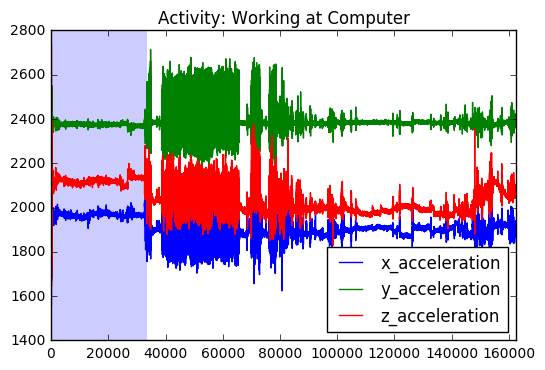

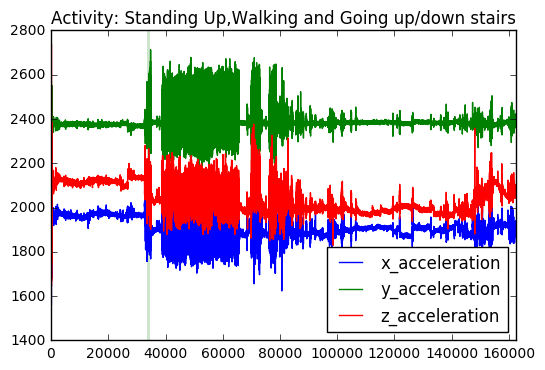

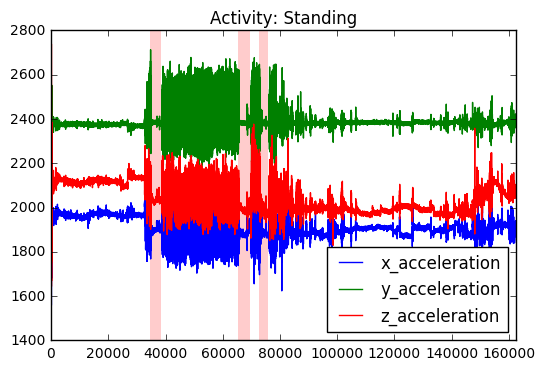

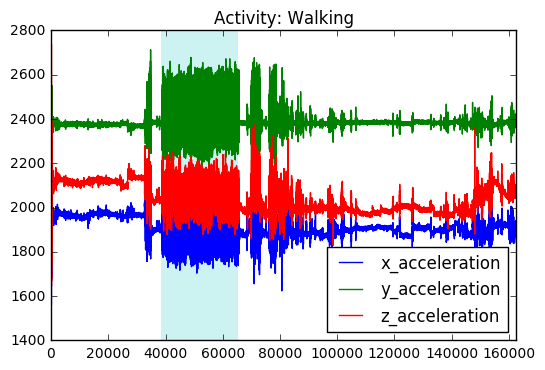

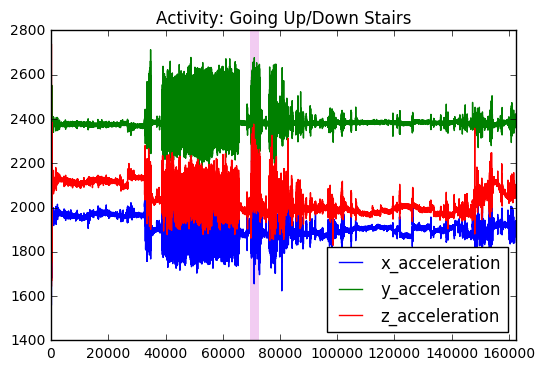

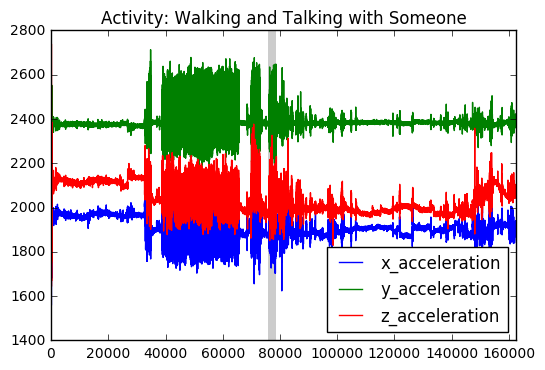

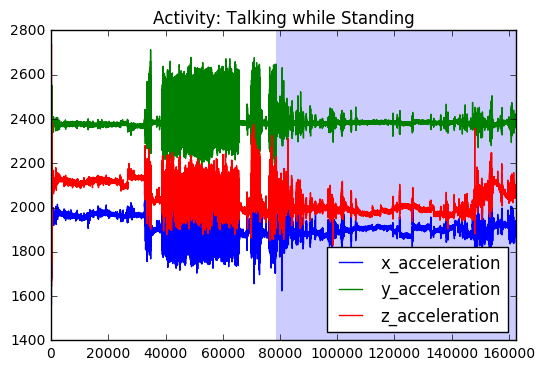

In [39]:
%matplotlib inline

from itertools import cycle
cycol = cycle('bgrcmk')

print("Activity Highlighted for Participant 0")

for a in range(1,config.act_num+1):
    
    plt = df[df['participant_id']==0][['x_acceleration','y_acceleration','z_acceleration']]\
            .plot(title="Activity: "+config.labels_dict[a])
        
    activity_ranges = index_grouping(df[(df['label']==a) & (df['participant_id']==0)].index.values.tolist())
    current_color = next(cycol)
    for a_range in activity_ranges:
        plt.axvspan(min(a_range),max(a_range),facecolor=current_color, edgecolor='none', alpha=.2)

In [ ]:
%matplotlib inline
for i in range(config.p_num):
    df[df['participant_id']==i][['x_acceleration','y_acceleration','z_acceleration']]\
    .plot(title="Sensor reading of participant " + str(i))